In [27]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

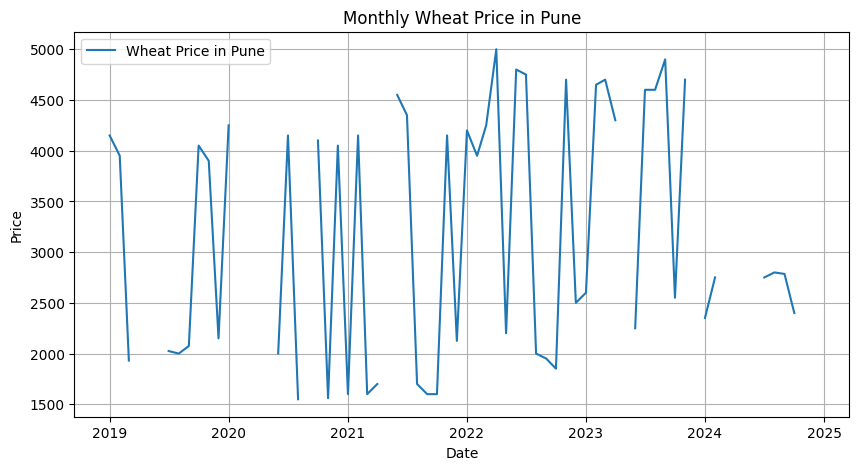

In [28]:
# Load the data
df = pd.read_csv('./Processed_Data/Wheat.csv')  # Update path if needed
df['Date'] = pd.to_datetime(df['Price_Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('MS')  # Monthly start frequency
df = df.sort_index()

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(df['Modal_Price'], label='Wheat Price in Pune')
plt.title('Monthly Wheat Price in Pune')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


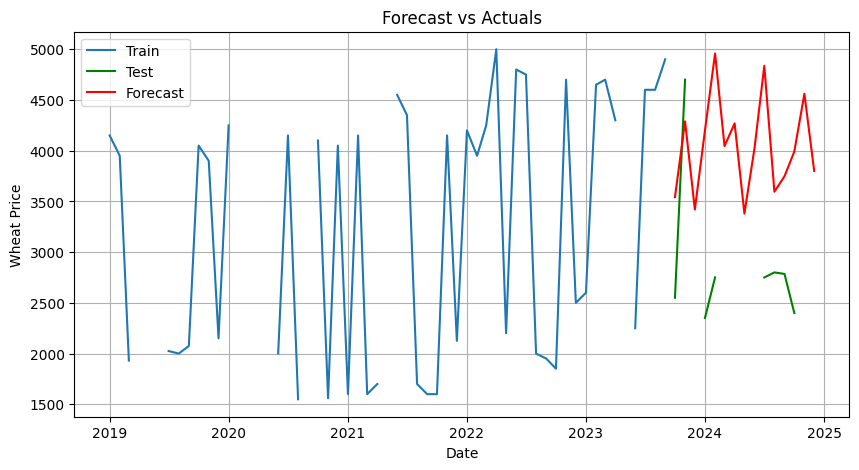

In [29]:
# Splitting data into training and testing
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit SARIMA model - adjust (p,d,q)(P,D,Q,s) as needed
model = SARIMAX(train['Modal_Price'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Modal_Price'], label='Train')
plt.plot(test.index, test['Modal_Price'], label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Wheat Price')
plt.legend()
plt.grid(True)
plt.show()




Evaluation Metrics:
MAE: 1351.33
RMSE: 1462.98


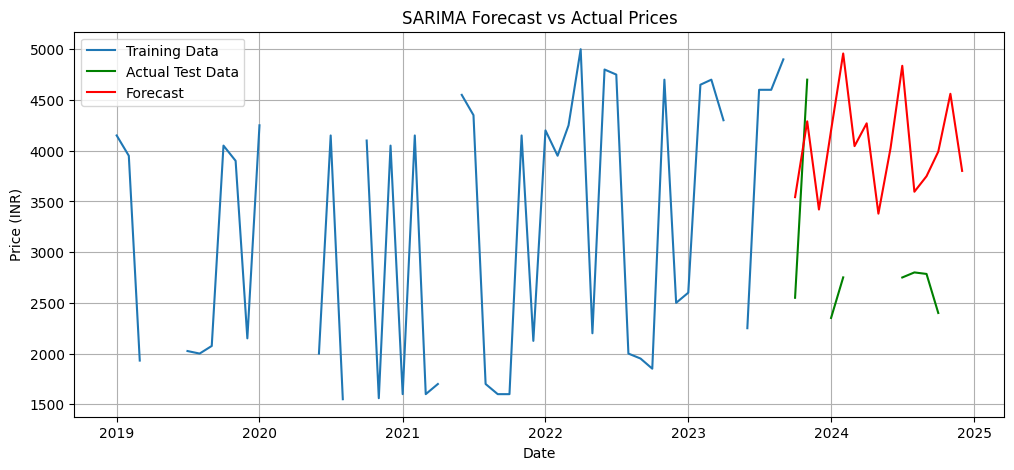

In [30]:
forecast = forecast[:len(test)]
actual = test['Modal_Price']
mask = ~actual.isna() & ~pd.isna(forecast)
actual_clean = actual[mask]
forecast_clean = forecast[mask]

mse = mean_squared_error(actual_clean, forecast_clean)
mae = mean_absolute_error(actual_clean, forecast_clean)
rmse = np.sqrt(mse)

print(f"\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


# Forecast future prices (e.g., next 12 months)
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Modal_Price'], label='Training Data')
plt.plot(test.index, test['Modal_Price'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

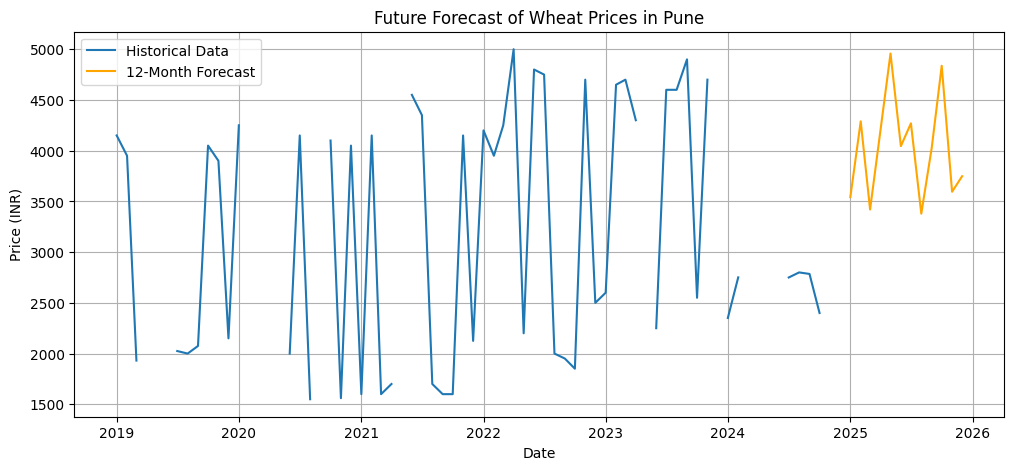

In [31]:
# Forecast future 12 months
future_steps = 12
future_forecast = model_fit.forecast(steps=future_steps)

# Plot future forecast
future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='MS')

plt.figure(figsize=(12, 5))
plt.plot(df['Modal_Price'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='12-Month Forecast', color='orange')
plt.title('Future Forecast of Wheat Prices in Pune')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()